In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Wine.csv')
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Customer_Segment  
0     3.92     1065                 1  
1     3.40     1050                 1  
2     3.17     1185                 1  
3     3.45     1480                 1  
4     2.93      735                 1  
..     ...      ...               ...  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3  

[178 rows x 14 columns]

In [3]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count       178.000000  178.000000  178.000000   178.000000        178.000000  
mean          5.058090    0.957449    2.611685   746.893258          1.938202  
std           2.318286    0.228572    0.709990   314.907474          0.775035  
min           1.280000    0.480000    1.270000   278.000000          1.000000  
25%           3.220000    0.782500    1.937500   500.500000          1.000000  
50%           4.690000    0.965000    2.780000   673.500000          2.000000  
75%           6.200000    1.120000    3.170000   985.000000          3.000000  
max          13.000000    1.710000    4.000000  1680.000000          3.000000

In [4]:
sns.pairplot(df)

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Segment', ylabel='count'>

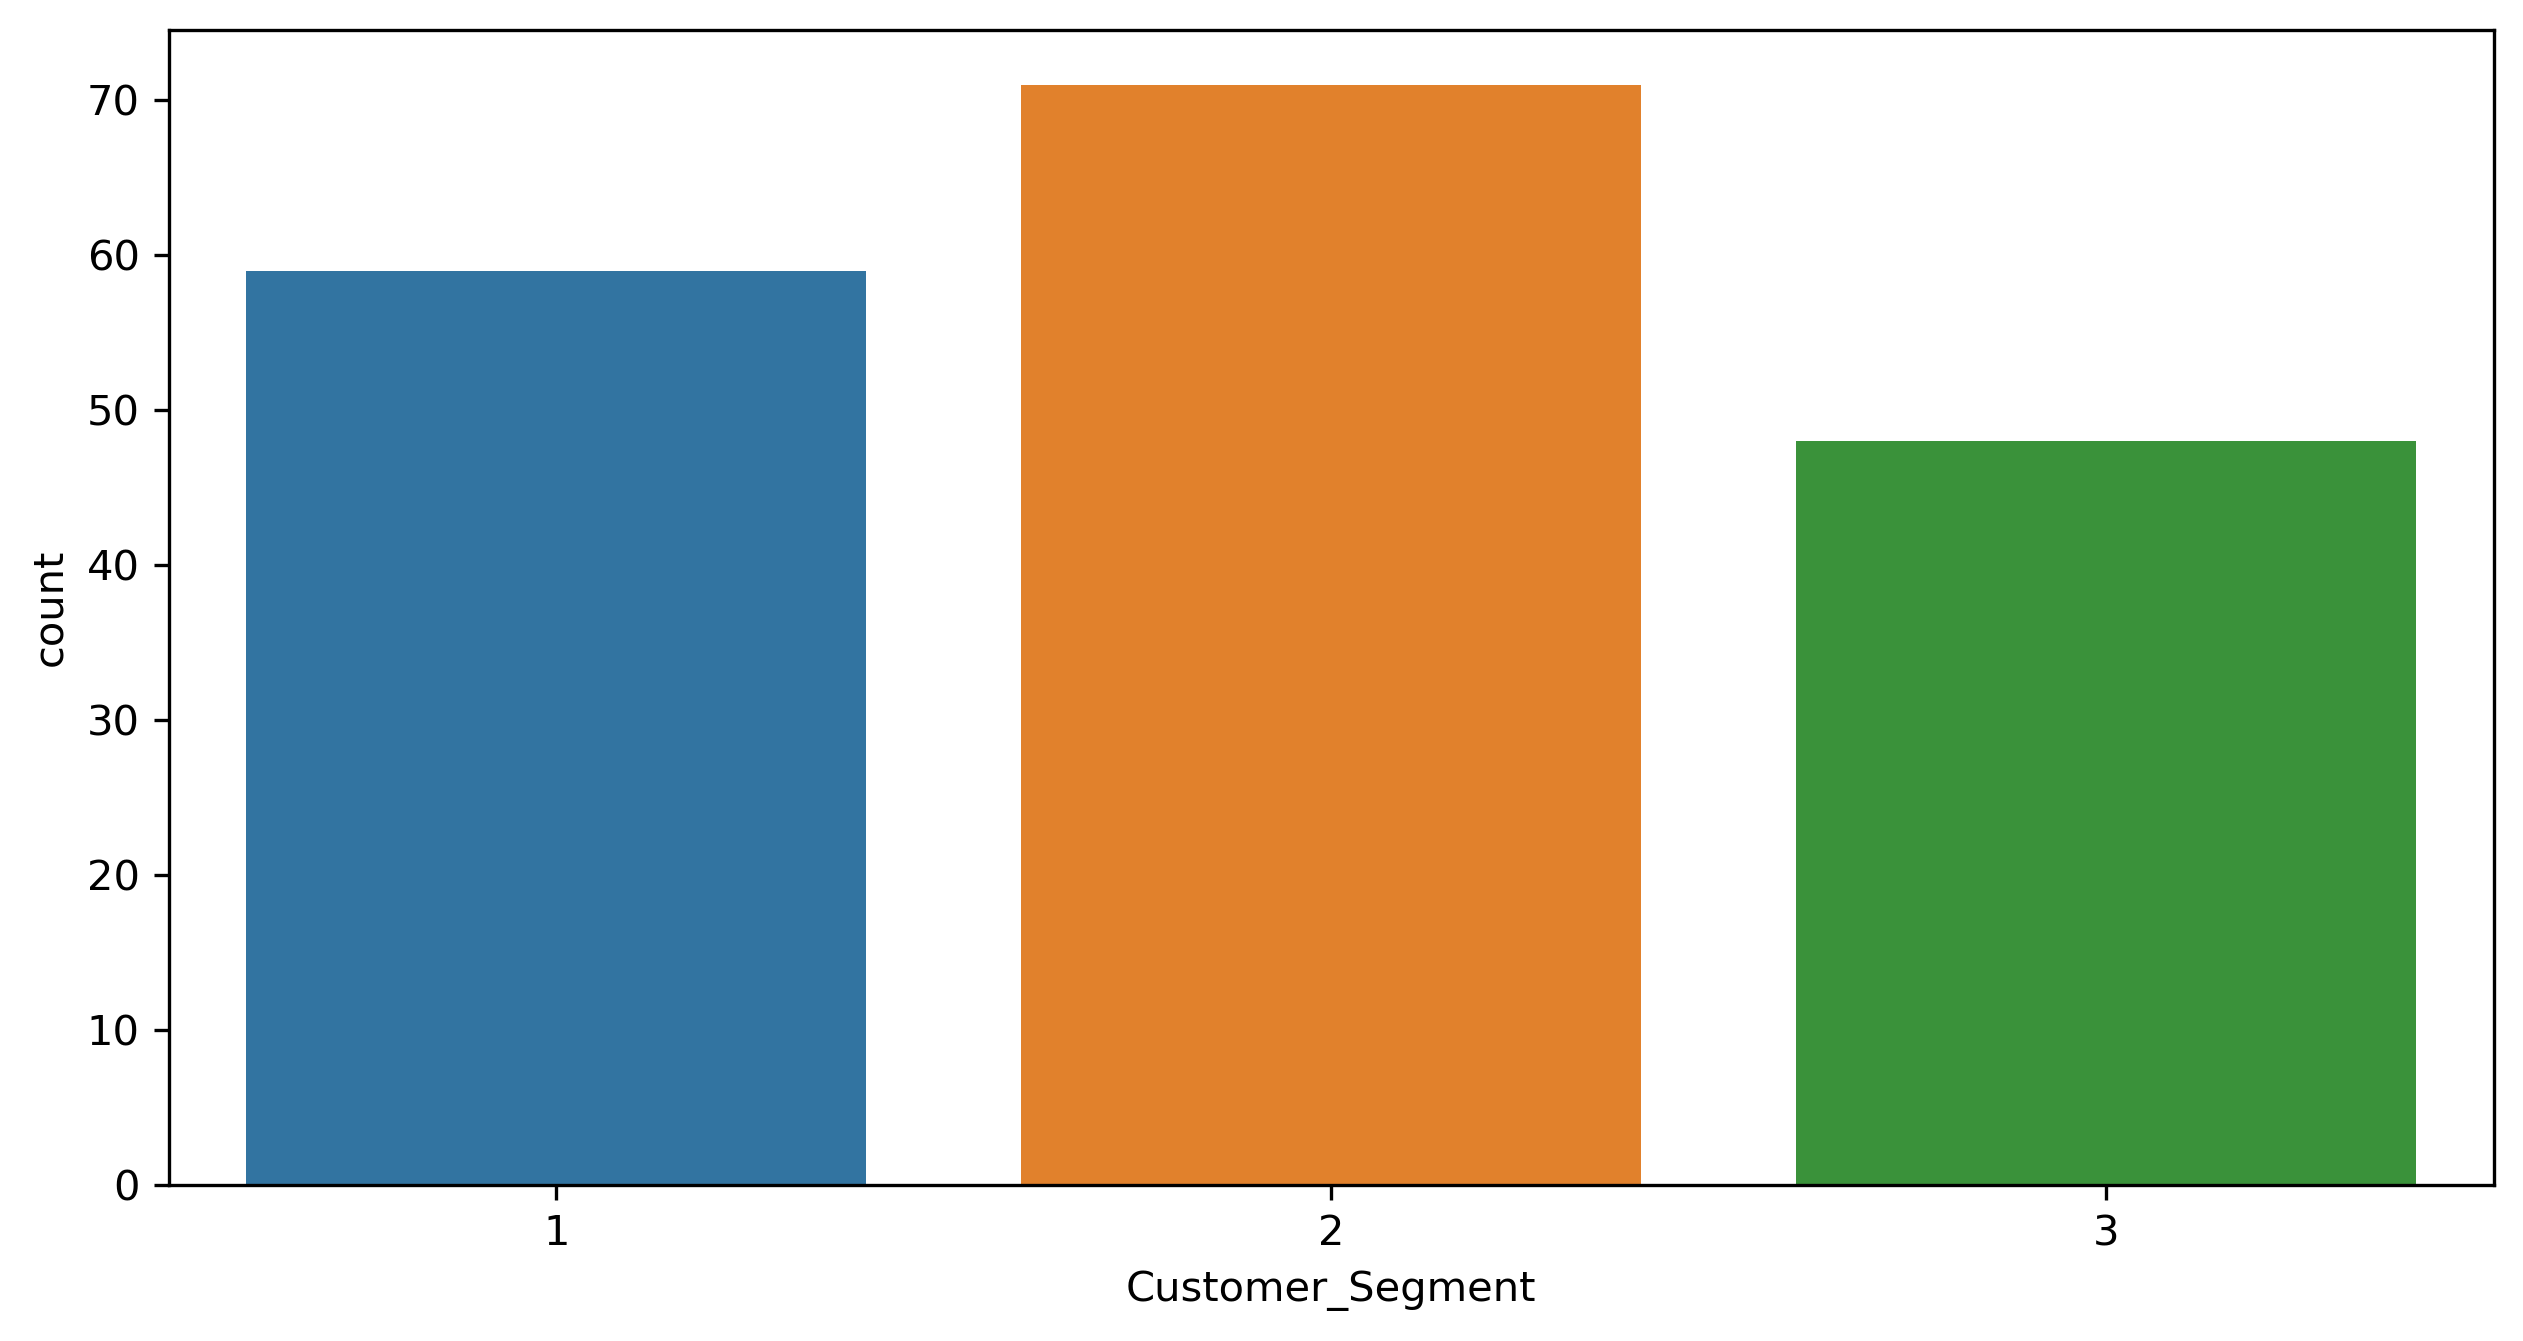

In [5]:
sns.countplot(df['Customer_Segment'])

In [6]:
x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [7]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [12]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



# PCA

In [13]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [15]:
pca = PCA()
pcs = pca.fit_transform(x)
pd.DataFrame(pcs)

0         1         2         3         4         5         6   \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

           7         8         9         10        11        12  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

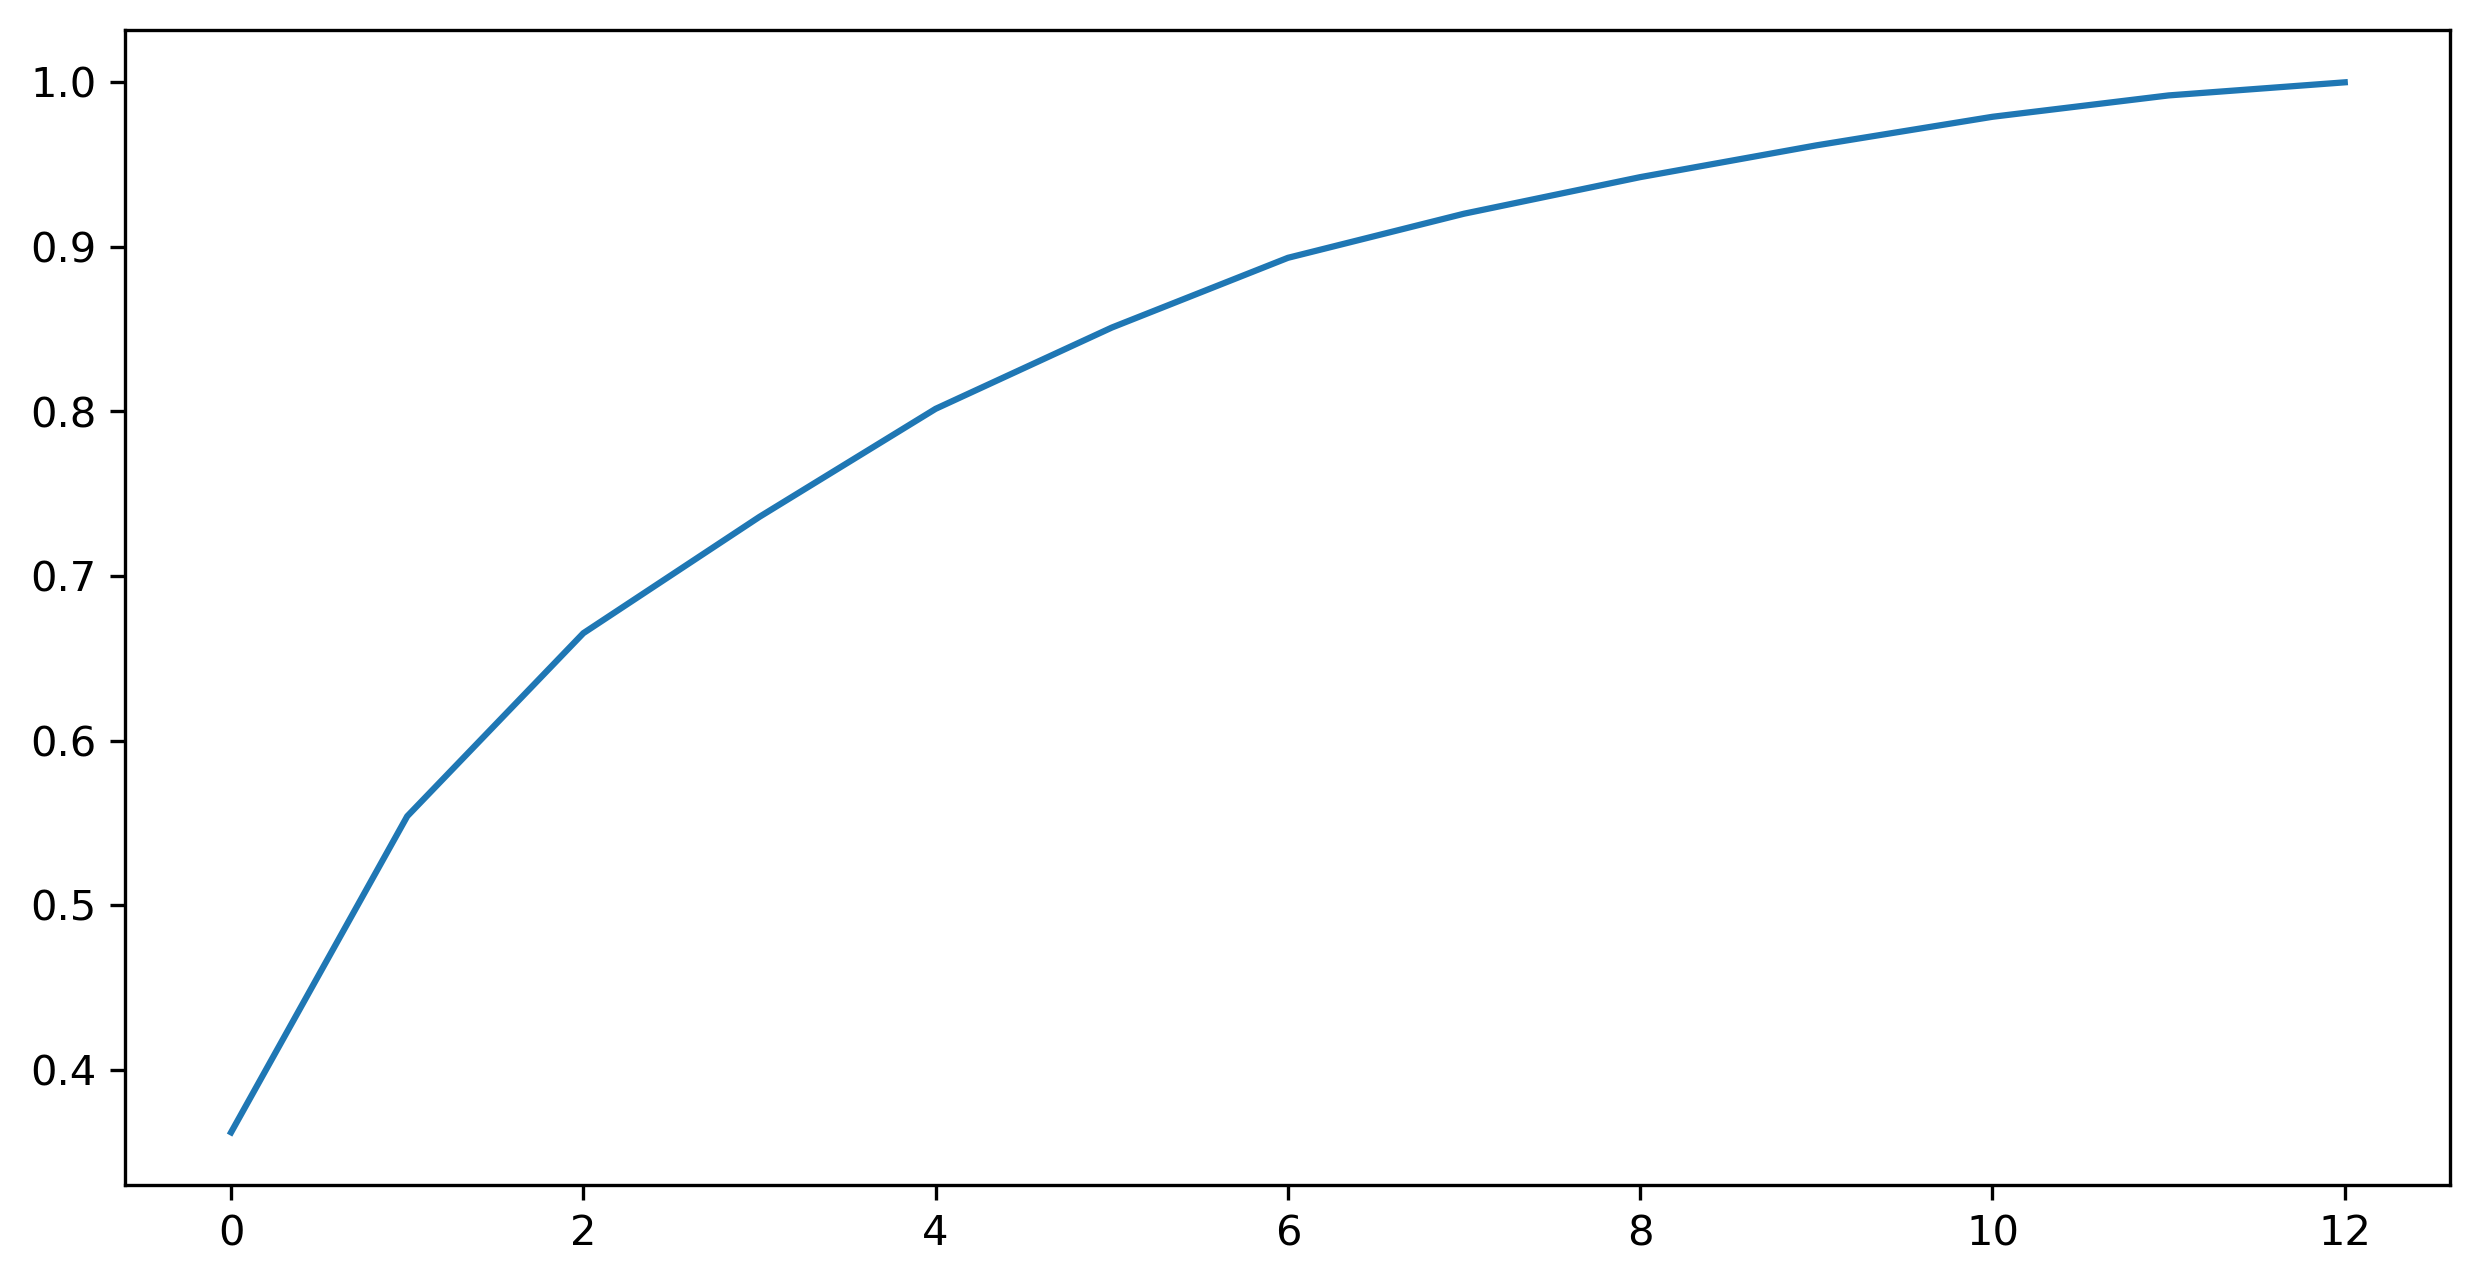

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [25]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [20]:
pca = PCA(n_components=7)
pcs = pca.fit_transform(x)
X = pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
X

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074
..        ...       ...       ...       ...       ...       ...       ...
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741

[178 rows x 7 columns]

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [24]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

